This script reads experimental results derived from EC072 progrenesis analysis.

B11 and B12 are two batches of experiment 1
B21 and B22 are two batches of experiment 2

In [24]:
import pandas, numpy, seaborn

In [25]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [26]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':20
                           })

# user-defined variables

In [27]:
experiment_two_input_file = '/Users/adrian/projects/vigur/data/lipidomics/072/progenesis/HPMVEC_POSB2_1andB2_2.csv'
metadata_file = '/Users/adrian/projects/vigur/data/lipidomics/072/EC-072 SAMPLE LIST_BATCHES_FORLCMS_INTRA_Lipidomics_FINAL_23032022.xlsx'

# read information

## 2.1. read data

In [28]:
df = pandas.read_csv(experiment_two_input_file, skiprows=2, index_col=0)
print(df.shape)
df.head()

(2715, 181)


,Neutral mass (Da),m/z,Charge,Retention time (min),Chromatographic peak width (min),Identifications,Anova (p),q Value,Max Fold Change,Highest Mean,...,Accepted Compound ID,Accepted Description,Adducts,Formula,Score,Fragmentation Score,Mass Error (ppm),Isotope Similarity,Retention Time Error (mins),Compound Link
Compound,,,,,,,,,,,,,,,,,,,,,
10.08_936.8967m/z,NaN,936.896653,1,10.079133,0.254917,0,0.999991,0.352602,9.995513,POS_072-155_5 µM epi:nor_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.61_723.5490m/z,NaN,723.549037,1,5.614083,0.184200,0,0.999931,0.352602,68.031645,POS_072-154_5 µM epi:nor_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.40_590.5467m/z,NaN,590.546703,1,7.396700,0.379217,0,0.998431,0.352602,3.712542,POS_072-153_5 µM epi:nor_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.70_677.5674m/z,NaN,677.567397,1,5.695150,0.135567,0,0.998398,0.352602,7.478135,POS_072-154_5 µM epi:nor_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.80_161.1325m/z,NaN,161.132516,1,4.795750,0.102683,0,0.998312,0.352602,2.385419,POS_072-153_5 µM epi:nor_24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## read metadata

In [29]:
metadata = pandas.read_excel(metadata_file, sheet_name='Master Sample List POS', index_col='File')
metadata.head()

,LCMS_SAMPLE,MS file,LC file,Sample ID,Experiment,Timepoint,Treatment,Rep,M/R/C,Total cells per well,Cell Count,MS BATCH,MS BATCH.1,Polarity
File,,,,,,,,,,,,,,
EC72_Lipidomics_000094,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000095,Pool,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000096,Solvent,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B2_1,POS
EC72_Lipidomics_000097,POS_072-153_5 µM epi:nor_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-153,2.0,24.0,5 µM epi:nor,1.0,C,3.33*10^5,333000.0,2.0,B2_1,POS
EC72_Lipidomics_000098,POS_072-156_TNFa_24,Aris_Neutrophiles_SCAN_pos,CSH_LIPID_Freyr-400flow,072-156,2.0,24.0,TNFa,1.0,C,3.40*10^5,340000.0,2.0,B2_1,POS


# manipulate data

Samples EC72_Lipidomics_000097 to EC72_Lipidomics_000213 are the appropriate.

In [30]:
normalized_data = df.iloc[:, 26:92]
print(list(normalized_data.columns)[:10])
print(list(normalized_data.columns)[-10:])
print(normalized_data.shape)
normalized_data.head()

['EC72_Lipidomics_000097', 'EC72_Lipidomics_000169', 'EC72_Lipidomics_000098', 'EC72_Lipidomics_000170', 'EC72_Lipidomics_000099', 'EC72_Lipidomics_000171', 'EC72_Lipidomics_000100', 'EC72_Lipidomics_000172', 'EC72_Lipidomics_000101', 'EC72_Lipidomics_000173']
['EC72_Lipidomics_000137', 'EC72_Lipidomics_000209', 'EC72_Lipidomics_000138', 'EC72_Lipidomics_000210', 'EC72_Lipidomics_000139', 'EC72_Lipidomics_000211', 'EC72_Lipidomics_000140', 'EC72_Lipidomics_000212', 'EC72_Lipidomics_000141', 'EC72_Lipidomics_000213']
(2715, 66)


,EC72_Lipidomics_000097,EC72_Lipidomics_000169,EC72_Lipidomics_000098,EC72_Lipidomics_000170,EC72_Lipidomics_000099,EC72_Lipidomics_000171,EC72_Lipidomics_000100,EC72_Lipidomics_000172,EC72_Lipidomics_000101,EC72_Lipidomics_000173,...,EC72_Lipidomics_000137,EC72_Lipidomics_000209,EC72_Lipidomics_000138,EC72_Lipidomics_000210,EC72_Lipidomics_000139,EC72_Lipidomics_000211,EC72_Lipidomics_000140,EC72_Lipidomics_000212,EC72_Lipidomics_000141,EC72_Lipidomics_000213
Compound,,,,,,,,,,,,,,,,,,,,,
10.08_936.8967m/z,118314.267205,3459.481930,40800.701205,24631.716071,31439.450785,16865.279079,93247.563855,12678.071836,42049.199313,18582.934491,...,37076.573749,24079.594179,32542.943664,17085.679962,29951.439211,18274.087903,35439.210024,20142.084334,34500.118179,16870.950605
5.61_723.5490m/z,163270.084811,0.000000,5069.183101,6981.777970,2463.881006,4901.494757,9446.727684,5915.630204,5046.518699,2531.231148,...,5717.656751,5728.678763,7677.428008,7204.330689,9276.669850,5992.857871,6122.465118,4706.395300,9445.987666,7870.153004
7.40_590.5467m/z,237958.095143,16354.810127,42564.098776,50983.636040,52279.900931,58900.631618,82536.721973,43790.081563,40725.301955,55368.017269,...,35299.084863,51957.013818,54339.125073,60440.613607,45799.081744,61361.936991,45628.814059,51806.117970,57557.953509,63484.082278
5.70_677.5674m/z,69704.264654,6987.224660,11213.714305,19866.308968,7057.210535,15235.525123,10716.312840,17194.488001,11815.051934,15773.433665,...,10225.614982,13417.664096,10446.254554,21990.249204,11679.330039,24498.639019,10687.548829,17425.554252,9238.955821,17666.564695
4.80_161.1325m/z,3248.516607,11564.805094,5824.600916,4781.299705,6457.377637,3464.723574,5358.485419,3351.274766,5085.581230,3400.687349,...,4970.572299,3798.596863,3632.574748,5674.700484,5128.174651,5741.501715,4850.654122,4354.270670,6590.677815,3246.275210


In [31]:
log_df = numpy.log10(normalized_data+1)
log_df.head()

,EC72_Lipidomics_000097,EC72_Lipidomics_000169,EC72_Lipidomics_000098,EC72_Lipidomics_000170,EC72_Lipidomics_000099,EC72_Lipidomics_000171,EC72_Lipidomics_000100,EC72_Lipidomics_000172,EC72_Lipidomics_000101,EC72_Lipidomics_000173,...,EC72_Lipidomics_000137,EC72_Lipidomics_000209,EC72_Lipidomics_000138,EC72_Lipidomics_000210,EC72_Lipidomics_000139,EC72_Lipidomics_000211,EC72_Lipidomics_000140,EC72_Lipidomics_000212,EC72_Lipidomics_000141,EC72_Lipidomics_000213
Compound,,,,,,,,,,,,,,,,,,,,,
10.08_936.8967m/z,5.073041,3.539137,4.610678,4.391512,4.497489,4.227019,4.969642,4.103087,4.623768,4.269138,...,4.569111,4.381667,4.512470,4.232658,4.476432,4.261859,4.549496,4.304126,4.537833,4.227165
5.61_723.5490m/z,5.212909,0.000000,3.705024,3.844028,3.391796,3.690417,3.975327,3.772074,3.703078,3.403503,...,3.757294,3.758130,3.885272,3.857654,3.967439,3.777706,3.786997,3.672781,3.975293,3.896038
7.40_590.5467m/z,5.376502,4.213672,4.629054,4.707439,4.718343,4.770127,4.916652,4.641386,4.609875,4.743267,...,4.547776,4.715653,4.735121,4.781336,4.660866,4.787906,4.659249,4.714389,4.760113,4.802672
5.70_677.5674m/z,4.843266,3.844367,4.049788,4.298139,3.848695,4.182886,4.030086,4.235415,4.072472,4.197954,...,4.009732,4.127709,4.019002,4.342250,4.067455,4.389160,4.028919,4.241212,3.965670,4.247177
4.80_161.1325m/z,3.511819,4.063176,3.765341,3.679637,3.810123,3.539794,3.729123,3.525340,3.706426,3.531694,...,3.696494,3.579738,3.560334,3.754019,3.710047,3.759101,3.685890,3.639015,3.818996,3.511519


# visualization before QN

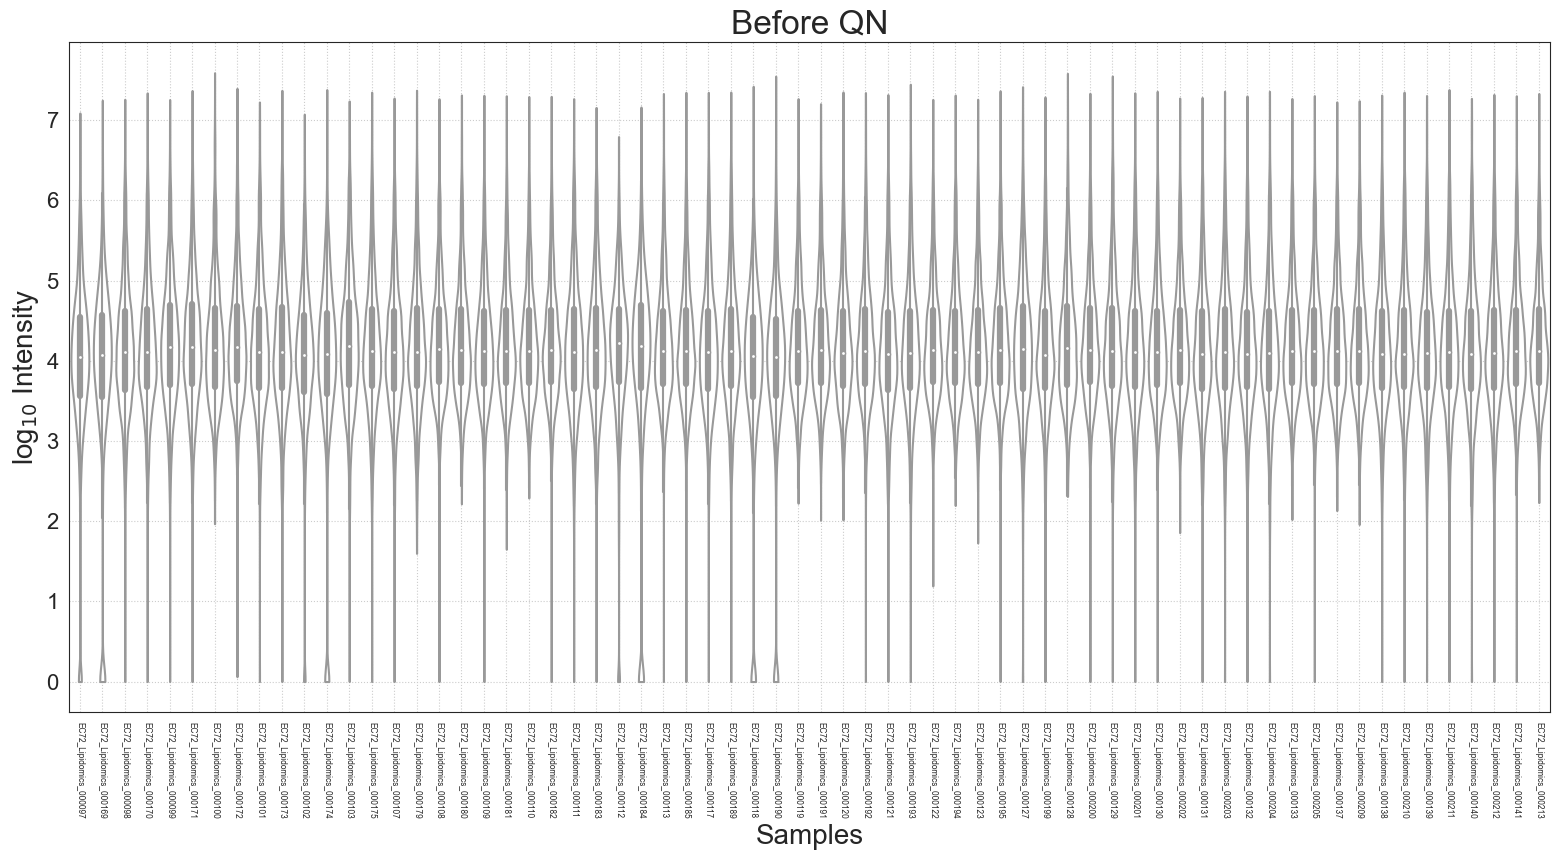

In [32]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log_df, cut=0, bw=.15, scale="count", color='white')
g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='Before QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [33]:
excluding_samples = []

variance explained [0.33958044 0.10579163]
(66, 2)
EC72_Lipidomics_000097
EC72_Lipidomics_000169
EC72_Lipidomics_000102
EC72_Lipidomics_000174
EC72_Lipidomics_000112
EC72_Lipidomics_000184
EC72_Lipidomics_000118
EC72_Lipidomics_000190


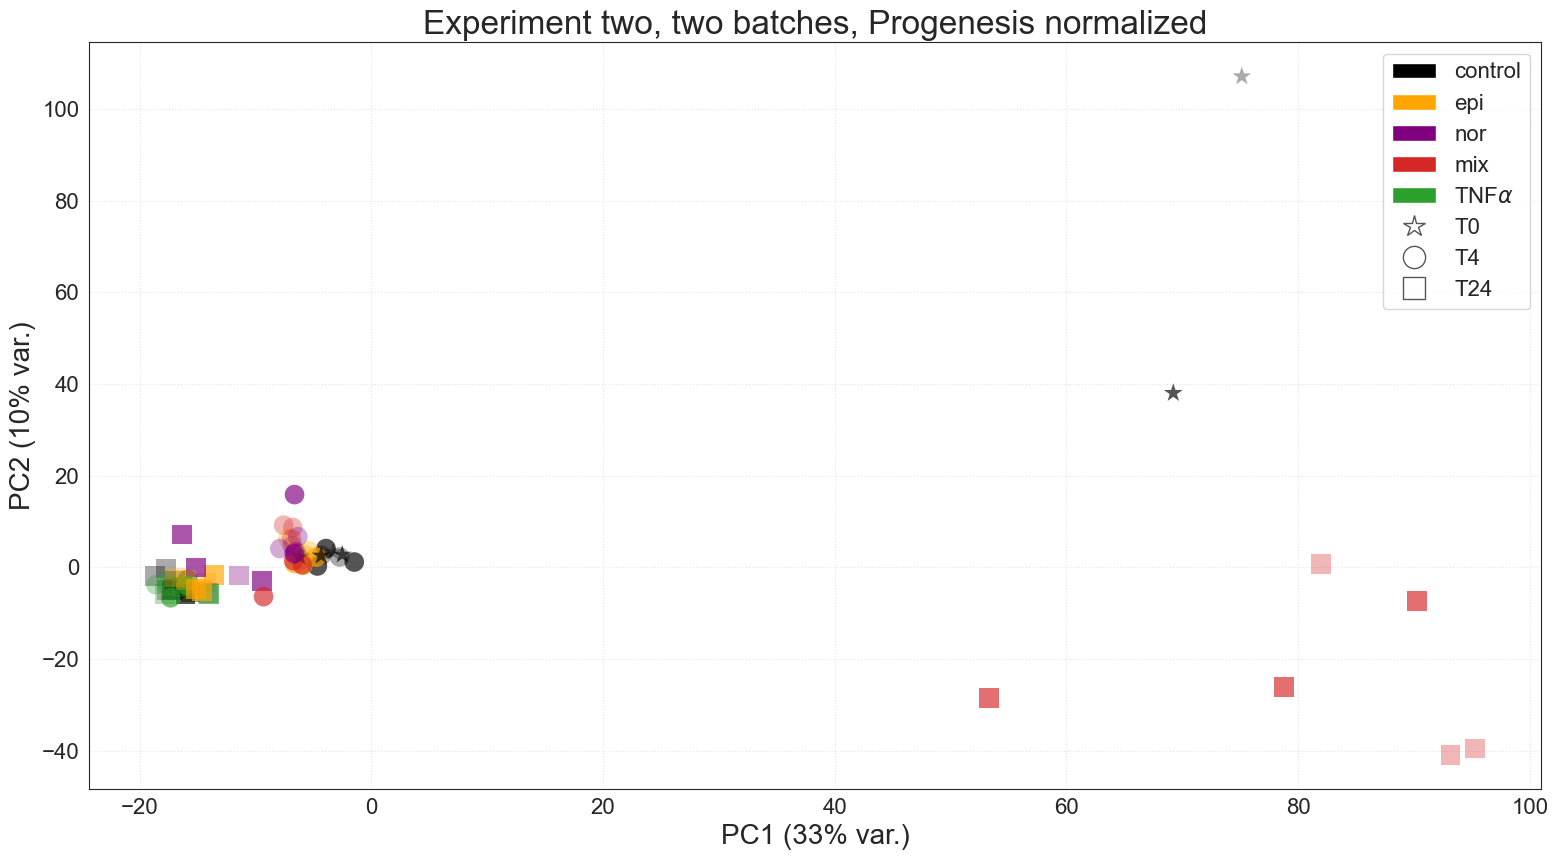

In [34]:
pca_data = log_df.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    #print(batchID)
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']
    
    if posx > 20:
        print(label)
        excluding_samples.append(label)

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment two, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [35]:
print(log_df.shape)
log_df.drop(columns=excluding_samples, inplace=True)
print(log_df.shape)

(2715, 66)
(2715, 58)


variance explained [0.18157623 0.10869566]
(58, 2)
EC72_Lipidomics_000098
EC72_Lipidomics_000170
EC72_Lipidomics_000101
EC72_Lipidomics_000173
EC72_Lipidomics_000103
EC72_Lipidomics_000175
EC72_Lipidomics_000107
EC72_Lipidomics_000179
EC72_Lipidomics_000111
EC72_Lipidomics_000183
EC72_Lipidomics_000193
EC72_Lipidomics_000127
EC72_Lipidomics_000201
EC72_Lipidomics_000131
EC72_Lipidomics_000203
EC72_Lipidomics_000210


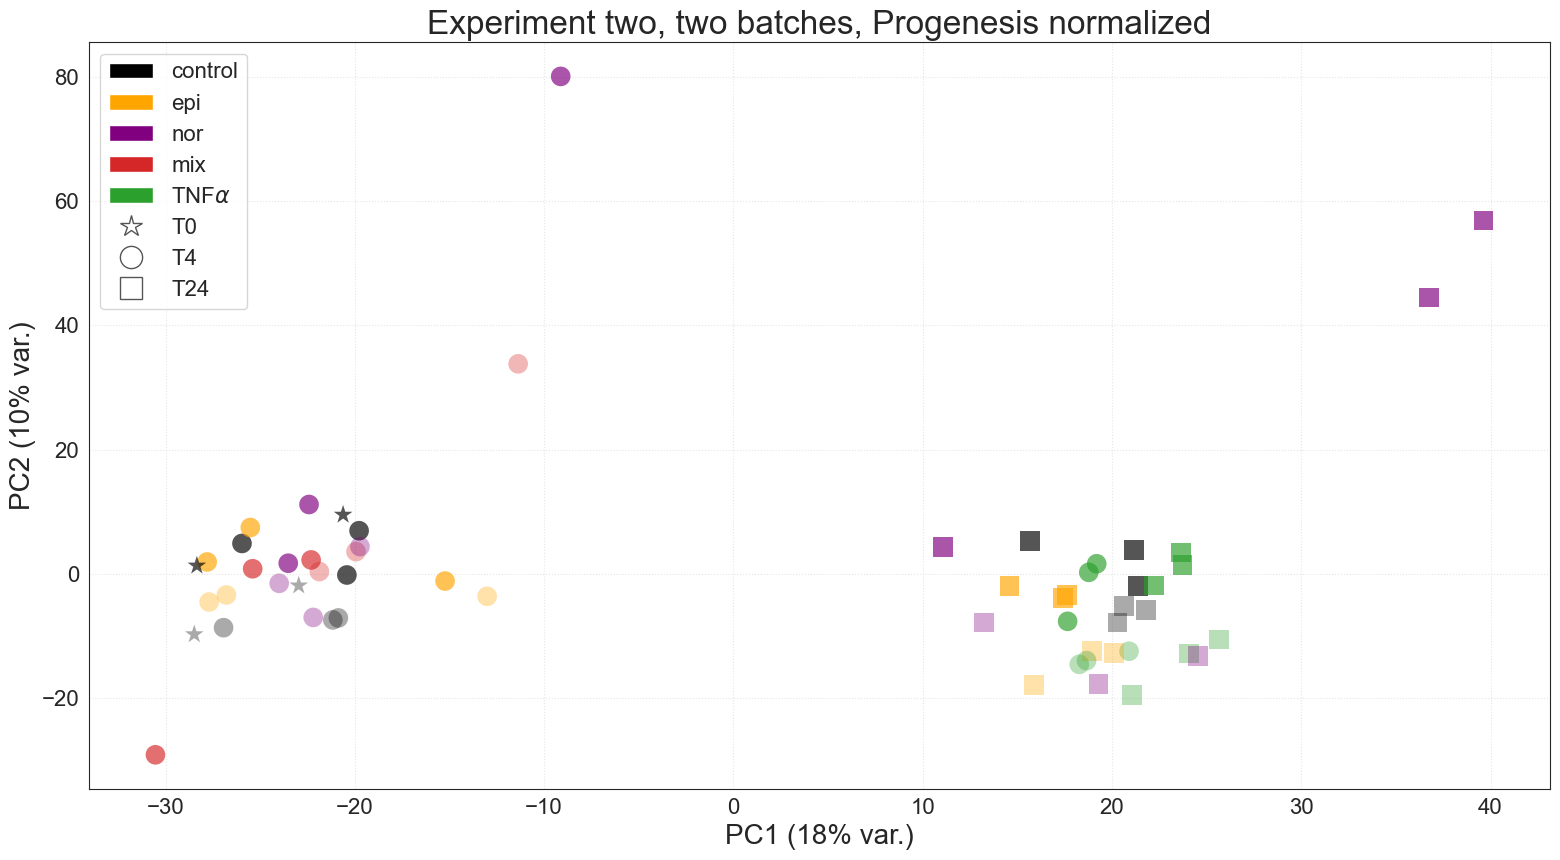

In [36]:
pca_data = log_df.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    #print(batchID)
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']
    
    if posx > 20:
        print(label)
        excluding_samples.append(label)

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment two, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# quantile normalization

In [37]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log_df.values, axis=0), 
                             index=log_df.index, 
                             columns=log_df.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log_df.rank(method="min").stack().astype(int).map(df_mean).unstack()

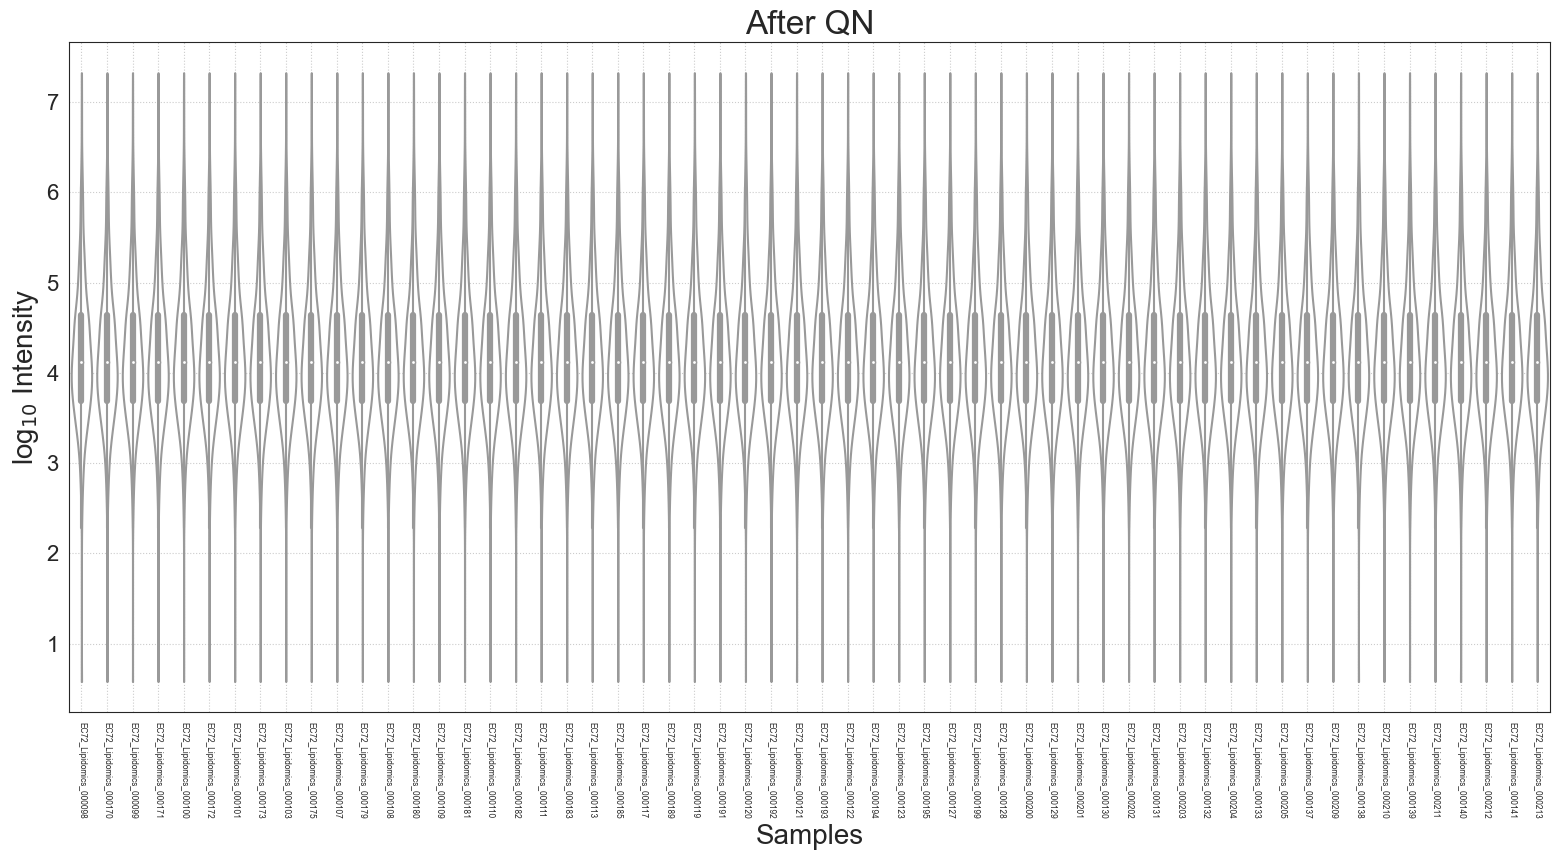

In [38]:
seaborn.set_style("white")
g = seaborn.violinplot(data=df_qn, cut=0, bw=.15, scale="count", color='white')
g.set(ylabel='log$_{10}$ Intensity', xlabel='Samples', title='After QN')
g.set_xticklabels(g.get_xticklabels(), rotation=-90, fontsize=6)

matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# visualization after QN

variance explained [0.18712727 0.10813809]
(58, 2)


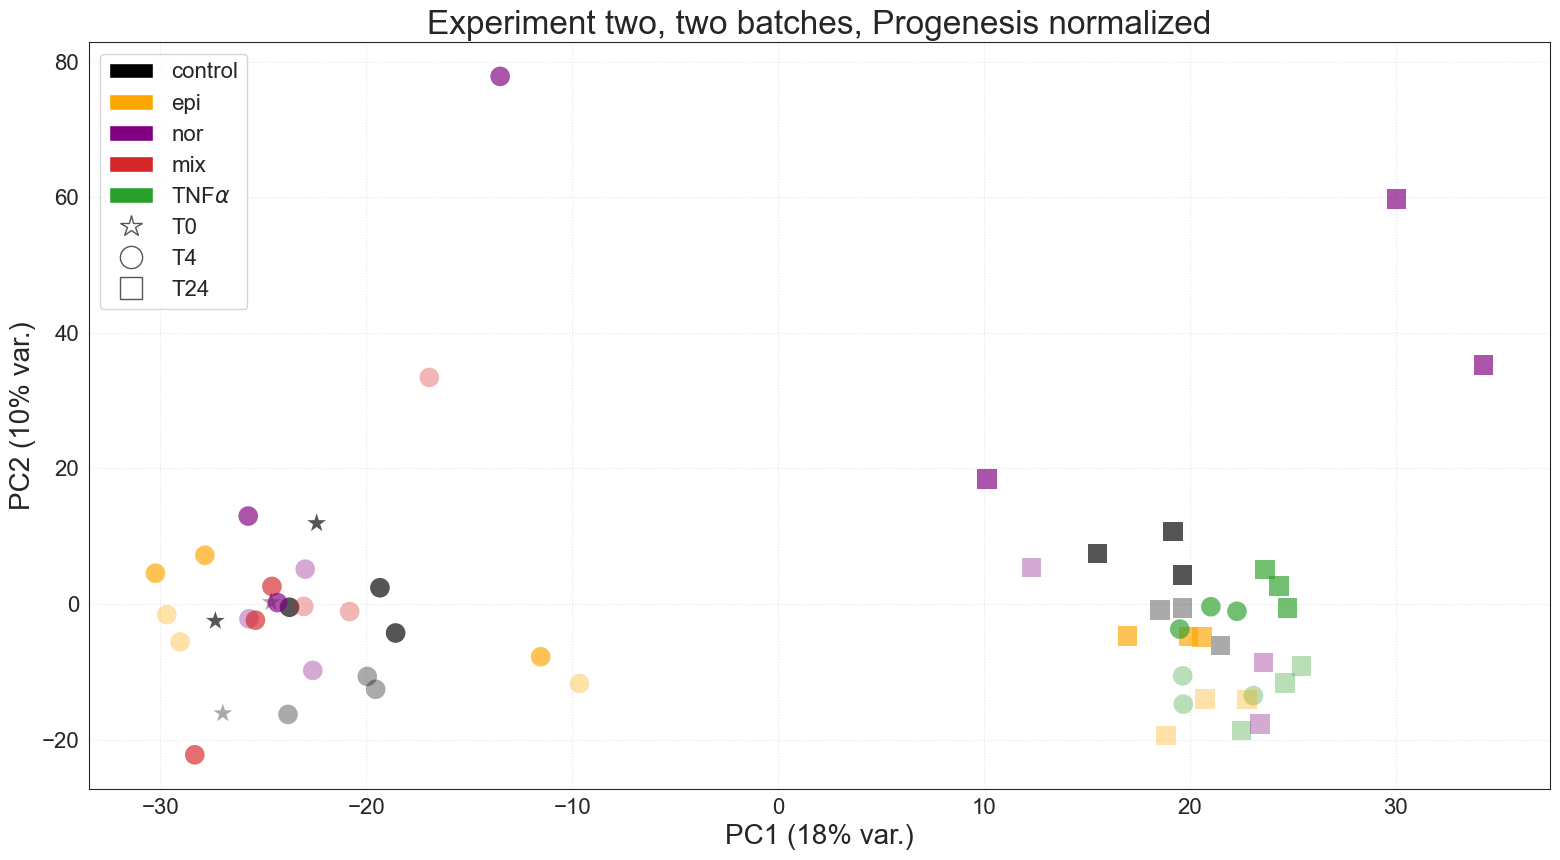

In [39]:
pca_data = df_qn.transpose()

x = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)
pca = sklearn.decomposition.PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principal_df = pandas.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

print('variance explained', pca.explained_variance_ratio_)

print(principal_df.shape)
principal_df.head()

#
# scatter plot
#
for i in range(len(pca_data.index)):
    
    label = pca_data.index[i]
    #print(label)
    
    # color for treatment
    treatment = metadata.loc[label, 'Treatment']
    if treatment == '0 µM' or treatment == '0µM':
        plotting_color = 'black'
    elif treatment == '5 µM epi':
        plotting_color = 'orange'
    elif treatment == '5 µM nor':
        plotting_color = 'purple'
    elif treatment == '5 µM epi:nor':
        plotting_color = 'tab:red'
    elif treatment == 'TNFa':
        plotting_color = 'tab:green'
    else:
        raise ValueError('treatment not detected')
        
    # marker for time point
    time_point = metadata.loc[label, 'Timepoint']
    if time_point == 0:
         plotting_marker = '*'
    elif time_point == 4:
         plotting_marker = 'o'
    elif time_point == 24:
         plotting_marker = 's'
    else:
        raise ValueError('timepoint not detected')
    
    # alpha for batch
    batchID = metadata.loc[label, 'MS BATCH.1']
    #print(batchID)
    if batchID[-1] == '1':
         plotting_alpha = 2/3
    elif batchID[-1] == '2':
         plotting_alpha = 1/3
    else:
        raise ValueError('batch not detected')
    
    
    # position
    posx = principal_df.iloc[i]['PC1']
    posy = principal_df.iloc[i]['PC2']

    # plot the dots
    matplotlib.pyplot.scatter(posx, posy, s=200, c=plotting_color, alpha=plotting_alpha, marker=plotting_marker, edgecolors='none')
    
# legend
legend_elements = [
    matplotlib.patches.Patch(facecolor='black', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='orange', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='purple', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:red', edgecolor='white'),
    matplotlib.patches.Patch(facecolor='tab:green', edgecolor='white'),
    
    matplotlib.lines.Line2D([0], [0], marker='*', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='o', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0),
    matplotlib.lines.Line2D([0], [0], marker='s', color='black', markerfacecolor='white', markersize=16, alpha=2/3, lw=0)
    ]
matplotlib.pyplot.legend(legend_elements, ['control', 'epi', 'nor', 'mix', 'TNF$\\alpha$', 'T0', 'T4', 'T24'], fontsize=16)

# close figure
matplotlib.pyplot.title('Experiment two, two batches, Progenesis normalized')
matplotlib.pyplot.grid(alpha=1/2, ls=':')
matplotlib.pyplot.xlabel('PC1 ({}% var.)'.format(int(pca.explained_variance_ratio_[0]*100)))
matplotlib.pyplot.ylabel('PC2 ({}% var.)'.format(int(pca.explained_variance_ratio_[1]*100)))

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [43]:
treatments = ['5 µM epi', '5 µM nor', '5 µM epi:nor', 'TNFa']
treatment_colors = ['tab:orange', 'tab:purple', 'tab:red', 'tab:green']
time_points = [4, 24]
fold_change_threshold = 1
clipping_threshold = 6
response_lipids = []

for time_point in time_points:
    for treatment in treatments:
        
        the_color = treatment_colors[treatments.index(treatment)]
                
        #
        # select control and treatment samples
        #
        rules = ((metadata['Treatment'] == '0 µM') | (metadata['Treatment'] == '0µM')) & (metadata['Timepoint'] == time_point) & (metadata['MS BATCH'] == 1)
        control_samples = metadata[rules].index.to_list()
        
        rules = (metadata['Treatment'] == treatment) & (metadata['Timepoint'] == time_point) & (metadata['MS BATCH'] == 1)
        treated_samples = metadata[rules].index.to_list()
                
        #
        # iterate over lipids to get position on scatter plot
        #
        fold_changes = []; pvalues = []

        for lipid in log_df.index:
            print(lipid)
            control_values = log_df.loc[lipid, control_samples].values
            treated_values = log_df.loc[lipid, treated_samples].values

            log2FC = numpy.median(treated_values) - numpy.median(control_values)
            statistic, pvalue = scipy.stats.ttest_ind(control_values, treated_values)
            fold_changes.append(log2FC); pvalues.append(pvalue)


10.08_936.8967m/z


KeyError: "None of [Index(['EC72_Lipidomics_000295', 'EC72_Lipidomics_000306',\n       'EC72_Lipidomics_000308', 'EC72_Lipidomics_000371',\n       'EC72_Lipidomics_000382', 'EC72_Lipidomics_000384'],\n      dtype='object')] are in the [index]"